Shape of data: (7000, 49152), Labels: (7000,)


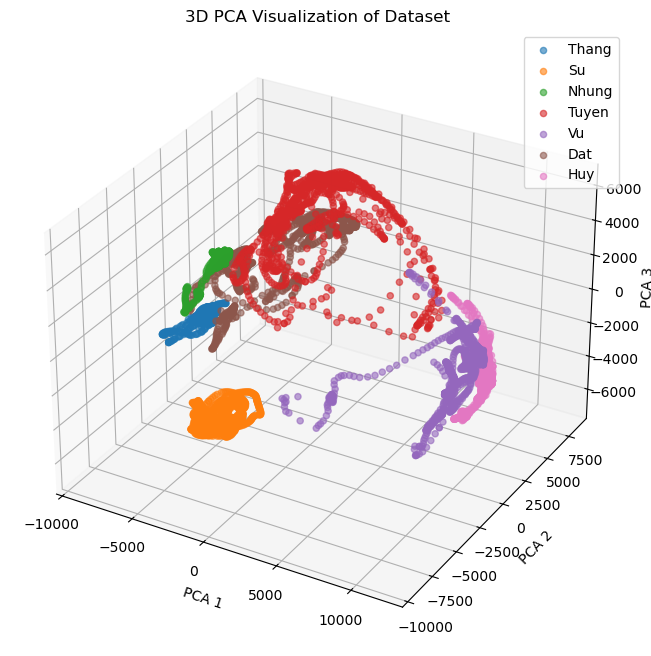

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Định nghĩa nhãn
labels_dict = {0: 'Thang', 1: 'Su', 2: 'Nhung', 3: 'Tuyen', 4: 'Vu', 5: 'Dat', 6: 'Huy'}

# Hàm để tải dữ liệu đã làm phẳng
from models.utils import load_data_flatten

def visualize_dataset(data_dir, n_components=2):
    X, y = load_data_flatten(data_dir)
    print(f"Shape of data: {X.shape}, Labels: {y.shape}")
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)

    if n_components == 2:
        plt.figure(figsize=(10, 8))
        for label in np.unique(y):
            idx = y == label
            plt.scatter(X_pca[idx, 0], X_pca[idx, 1], label=labels_dict[label], alpha=0.6)
        plt.xlabel('PCA 1')
        plt.ylabel('PCA 2')
        plt.title('2D PCA Visualization of Dataset')
        plt.legend()
        plt.show()
    elif n_components == 3:
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        for label in np.unique(y):
            idx = y == label
            ax.scatter(X_pca[idx, 0], X_pca[idx, 1], X_pca[idx, 2], label=labels_dict[label], alpha=0.6)
        ax.set_xlabel('PCA 1')
        ax.set_ylabel('PCA 2')
        ax.set_zlabel('PCA 3')
        plt.title('3D PCA Visualization of Dataset')
        plt.legend()
        plt.show()
    else:
        print("Only 2D or 3D visualization is supported.")

if __name__ == "__main__":
    # Thay đổi đường dẫn tới thư mục dữ liệu phù hợp
    data_dir = r"D:\data_ML\data_collect"
    # Chọn 2 hoặc 3 thành phần PCA để trực quan hóa
    visualize_dataset(data_dir, n_components=3)  # Đổi thành 3 để xem 3D

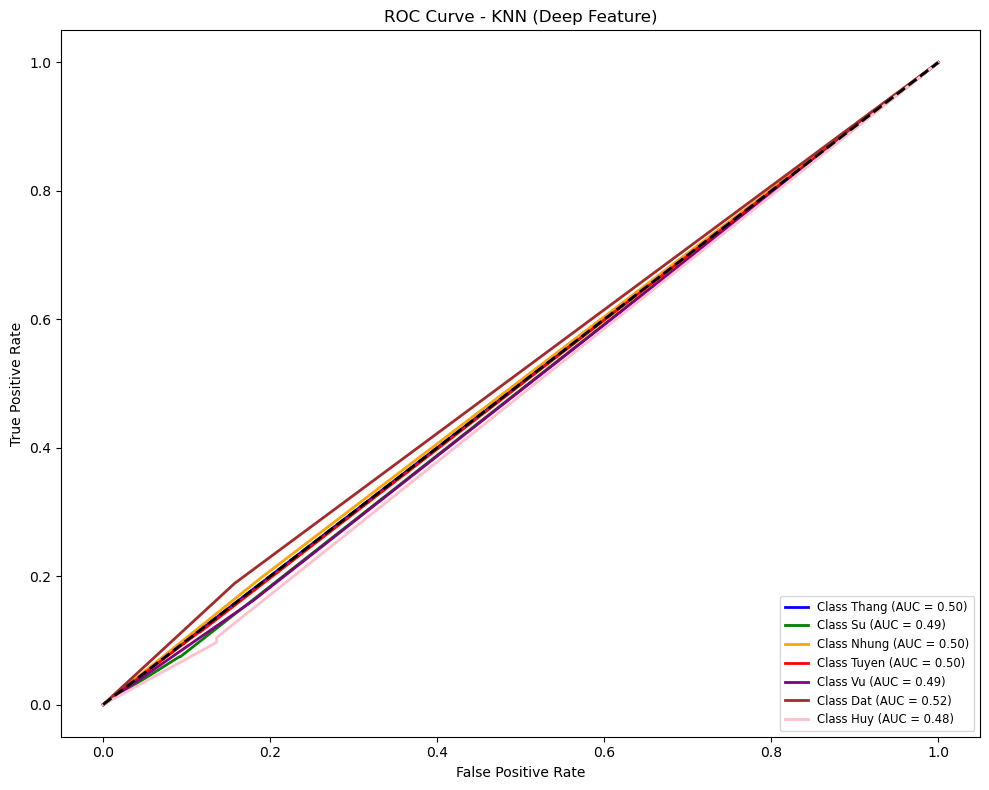

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import joblib

# Danh sách nhãn
labels = ['Thang', 'Su', 'Nhung', 'Tuyen', 'Vu', 'Dat', 'Huy']
num_classes = len(labels)

def plot_roc_curve(model_path, X_test, y_test, model_type, feature_type):
    model = joblib.load(model_path)
    y_test_bin = label_binarize(y_test, classes=list(range(num_classes)))
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)
    elif hasattr(model, "decision_function"):
        y_score = model.decision_function(X_test)
    else:
        raise ValueError("Model does not support probability or decision function.")

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Vẽ ROC cho từng lớp
    plt.figure(figsize=(10, 8))
    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {labels[i]} (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_type} ({feature_type})')
    plt.legend(loc='lower right')
    plt.show()

if __name__ == "__main__":
    # Ví dụ cho KNN với đặc trưng deep (ex)
    import os
    X_features = np.load(os.path.join('weights', 'data_features.npy'))
    # Đọc nhãn từ data_crop
    labels_dict = {0: 'Thang', 1: 'Su', 2: 'Nhung', 3: 'Tuyen', 4: 'Vu', 5: 'Dat', 6: 'Huy'}
    labels_list = []
    for label, name in labels_dict.items():
        person_dir = os.path.join('data_ML/data_crop', name)
        for image_name in os.listdir(person_dir):
            labels_list.append(label)
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X_features, labels_list, test_size=0.2, random_state=42)
    model_path = r"weights/knn_model_ex_optimal.joblib"
    plot_roc_curve(model_path, X_test, y_test, model_type="KNN", feature_type="Deep Feature")

    # Có thể lặp lại cho các mô hình khác bằng cách thay đổi model_path và dữ liệu đầu vào
